# 회귀분석 3장 연습문제1
> 3장 연습문제1

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["R", "회귀분석"]

# 3.3) 어느 증권회사에서의 주가x와 종합주가지수y 분석

Base

In [11]:
x <- c(650, 670, 690, 650, 660, 650, 670, 660, 690, 710)
y <- c(210, 212, 217, 215, 216, 214, 220, 218, 220, 224)
lm33 <- lm(y~x)

### 1) 표본상관계수 구하기

In [12]:
cor(x,y)

[1] 0.7572034

### 2) 단순회귀선 추정, 산점도

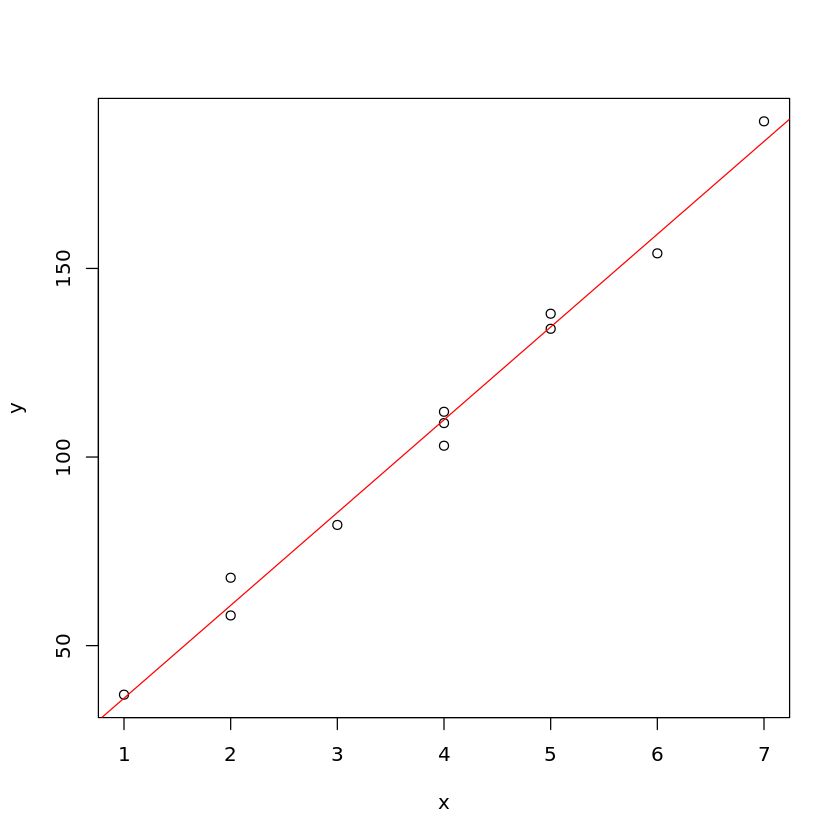

In [39]:
plot(y~x)
abline(lm(y~x),col="red")

### 3) MSE 계산 및 산점도와 비교

In [14]:
anova(lm33)
summary(lm33)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,88.52632,88.526316,10.75104,0.01120658
Residuals,8,65.87368,8.234211,NA,NA



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6000 -1.9026  0.6895  1.4132  3.4000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 114.33684   31.20166   3.664  0.00636 **
x             0.15263    0.04655   3.279  0.01121 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.87 on 8 degrees of freedom
Multiple R-squared:  0.5734,	Adjusted R-squared:   0.52 
F-statistic: 10.75 on 1 and 8 DF,  p-value: 0.01121


### 4) 잔차를 구하고 합이 0이 되는 것을 확인

In [15]:
lm33$residuals

1          2          3          4          5          6          7 
-3.5473684 -4.6000000 -2.6526316  1.4526316  0.9263158  0.4526316  3.4000000 
         8          9         10 
 2.9263158  0.3473684  1.2947368

In [16]:
-3.5473684-4.6000000-2.6526316+1.4526316+0.9263158+0.4526316+3.4000000+2.9263158+0.3473684+1.2947368

[1] 8.881784e-16

In [17]:
sum(lm33$residuals)

[1] 1.554312e-15

$\to$ 둘다 0에 수렴하는 값

### 5) 잔차들의 x에 의한 가중합이 0이 됨을 보이기

In [18]:
res33 <- lm33$residuals
x*res33

1          2          3          4          5          6          7 
-2305.7895 -3082.0000 -1830.3158   944.2105   611.3684   294.2105  2278.0000 
         8          9         10 
 1931.3684   239.6842   919.2632

In [19]:
-2305.7895 -3082.0000 -1830.3158+944.2105+611.3684+294.2105+2278.0000+ 1931.3684 +239.6842 + 919.2632

[1] -1e-04

In [20]:
sum(x*res33)

[1] -4.547474e-13

$\to$ 둘다 0에 수렴하는 값

### 6) 잔차들의 yhat에 의한 가중합이 0이 됨을 보이기

In [21]:
res33*0.15263+(res33*(114.33684*x)) 

1          2          3          4          5          6          7 
-263637.22 -352386.84 -209272.93  107958.27   69902.07   33639.17  260459.84 
         8          9         10 
 220827.01   27404.79  105105.84

In [22]:
-263637.22 -352386.84 -209272.93 + 107958.27 +  69902.07 +  33639.17  +260459.84 + 220827.01  + 27404.79+  105105.84

[1] 1.164153e-10

In [23]:
sum(res33*0.15263+(res33*(114.33684*x)) )

[1] 4.365575e-11

$\to$ 둘다 0에 수렴하는 값

_______________________

# 3.5) 어떤 컴퓨터회사의 서비스 요구건수와 수리시간 분석

Base

In [24]:
library(ggplot2)
x <- c(4,2,5,7,1,3,4,5,2,4,6)
y <- c(109,58,138,189,37,82,103,134,68,112,154)
lm35 <- lm(y~x)

### 1) 산점도 그리기

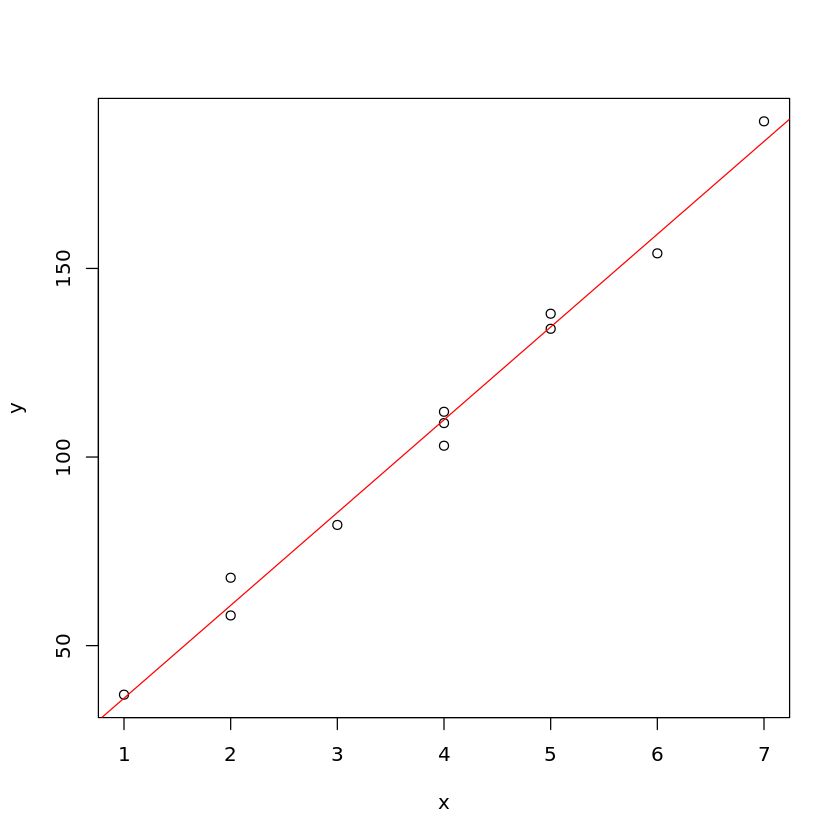

In [41]:
plot(y~x)
abline(lm35,col="red")

### 2) 1차선형회귀선을 가정하고 최소제곱추정량 b0와 b1구하기

In [26]:
coef(lm35) # b0(절편,intercept), b1(기울기,x)

(Intercept)           x 
   11.46409    24.60221

In [27]:
xbar <- mean(x)
ybar <- mean(y)
minusx <- x-xbar
minusy <- y-ybar

In [28]:
Sxx <- sum(minusx^2)
Sxx

[1] 32.90909

In [29]:
Syy <- sum(minusy^2)
Syy

[1] 20110.55

In [30]:
Sxy <- sum(minusx*minusy)
Sxy

[1] 809.6364

In [31]:
b1 <- Sxy/Sxx
b1

[1] 24.60221

In [32]:
b0 <- ybar - b1*xbar
b0

[1] 11.46409

### 3) 추정치 b1의 의미를 설명하여라
>기울기

### 4) 서비스 수가 4일 때 수리시간 추정, 추정값의 의미
>적합된 회귀선으로 추정한 x=4 일때의 y의 예측(추정) 값

>*yhat=b0+b1x*

In [33]:
b0+b1*4

[1] 109.8729

### 5) 산정도 위에 추정된 회귀직선 도시하고 잔차표시

In [34]:
library(ggplot2)
library(modelr)

In [35]:
df <- data.frame(x,y)
df

x,y
<dbl>,<dbl>
4,109
2,58
5,138
7,189
1,37
3,82
4,103
5,134
2,68


In [36]:
103-109.86

[1] -6.86

`geom_smooth()` using formula 'y ~ x'



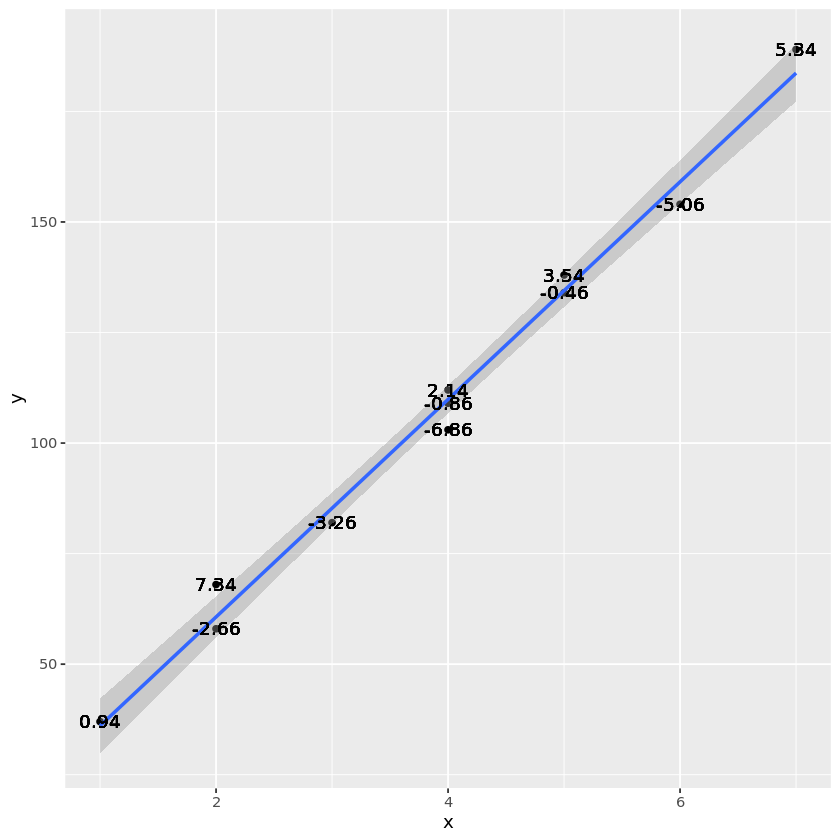

In [37]:
ggplot(df, aes(x=x, y=y)) + 
geom_point() + 
stat_smooth(method='lm') +
geom_text(x=1,y=37,label="0.94")+
geom_text(x=2,y=58,label="-2.66")+
geom_text(x=2,y=68,label="7.34")+
geom_text(x=3,y=82,label="-3.26")+
geom_text(x=4,y=103,label="-6.86")+
geom_text(x=4,y=109,label="-0.86")+
geom_text(x=4,y=112,label="2.14")+
geom_text(x=5,y=134,label="-0.46")+
geom_text(x=5,y=138,label="3.54")+
geom_text(x=6,y=154,label="-5.06")+
geom_text(x=7,y=189,label="5.34")

### 6) 상관계수 구하기

In [38]:
cor(x,y)

[1] 0.9952224

__________________________

# 3.9) 어느 학급의 시험점수y와 결석일수x 사이의 관계

n=50

$\sum_{}^{} x_i$ = 18

$\sum_{}^{} y_i$ = 3000

$\sum_{}^{} xy$ = 8800

$\sum_{}^{} x^2$ = 680

$\sum_{}^{} y_i^2$ = 196000

### 1) 시험점수와 결석일수 사이의 표본상관계수를 구하여라

> 표본상관계수 : $r_xy = \frac{S_(xy)}{S_x S_y} = 157.551/(3.7075 * 18.07)=2.3517 $

> $S_xy = \frac{1}{n-1} \{ \sum_{}^{} xy - \frac{\sum_{}^{} x \sum_{}^{} y}{n} \} =157.551$

> $S_x = \sqrt{\frac{1}{n-1} \{ \sum_{}^{} x^2 - \frac{\sum_{}^{} x^2}{n} \}} = 3.7075$

> $S_y = \sqrt{\frac{1}{n-1} \{ \sum_{}^{} y^2 - \frac{\sum_{}^{} y^2}{n} \}} = 18.07$

### 2) 대체모형 회귀선에서 beta_0 과 beta_1 의 최소제곱추정량을 구해라

> 정규방정식
>> $b_0n + b_1 \sum_{}^{} x_i = \sum_{}^{} y_i$

>> $b_0\sum_{}^{} x_i + b_1 \sum_{}^{} x_i^2 = \sum_{}^{} x_i y_i$

>>> 50$b_0$+18$b_1$=3000

>>> 18$b_0$+680$b_1$=8800 이고, 연립방정식을 풀면

>>> $b_0$ = 55.87 , $b_1$ = 11.46 이다.

### 3) 결석을 3번한 학생에 대한 평균성적의 추정량을 계산하여라.

> $\hat{y} =  b_0 + b_1x \to \hat{y} = 55.87 + 11.46 * 3 = 90.25$

### 4) 오차항 $\epsilon$ 의 표준편차 $\sigma$ 를 구하여라

> $SSE= \sum_{}^{} y_i^2 -  b_0 \sum_{}^{} y_i - b_1 \sum_{}^{} xy    =196000-55.87×3000-11.46×8800 = -72458$

> $\sigma = MSE = \frac{SSE}{n-2} = -1510$